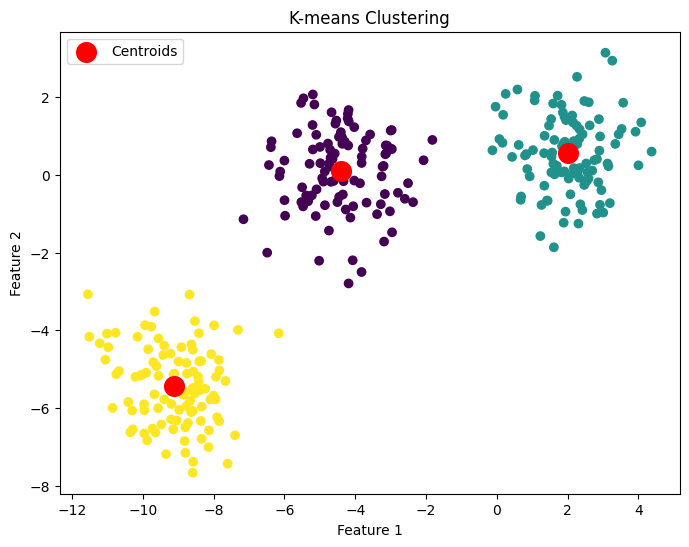

In [1]:
# prompt: Faça um exemplo de k-means

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Gerar dados de exemplo
n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Executar o algoritmo k-means
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

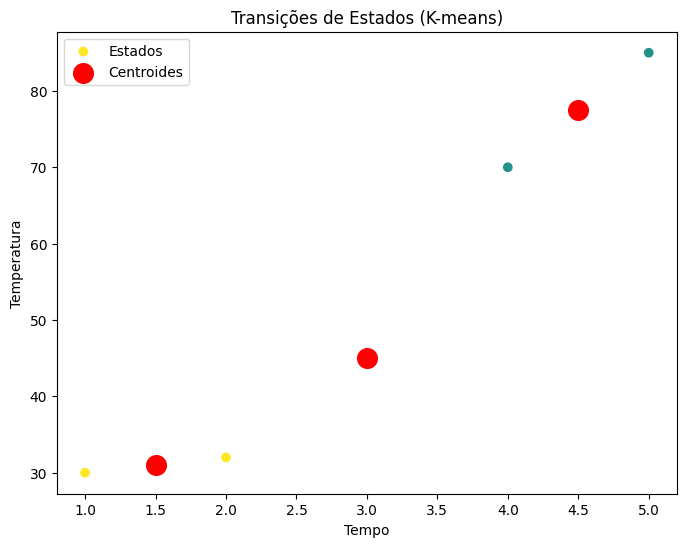

Transições de estados:
Transição no tempo 3: Estado 2 → Estado 0
Transição no tempo 4: Estado 0 → Estado 1


In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simulação de dados (exemplo: temperatura ao longo do tempo)
tempo = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Tempo
temperatura = np.array([30, 32, 45, 70, 85]).reshape(-1, 1)  # Temperatura

# Combinar os dados em um único array
dados = np.hstack((tempo, temperatura))

# Aplicar K-means para encontrar 3 estados (clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
rótulos = kmeans.fit_predict(dados)

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(dados[:, 0], dados[:, 1], c=rótulos, cmap='viridis', label='Estados')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('Transições de Estados (K-means)')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

# Identificar transições
print("Transições de estados:")
for i in range(1, len(rótulos)):
    if rótulos[i] != rótulos[i-1]:
        print(f"Transição no tempo {tempo[i][0]}: Estado {rótulos[i-1]} → Estado {rótulos[i]}")


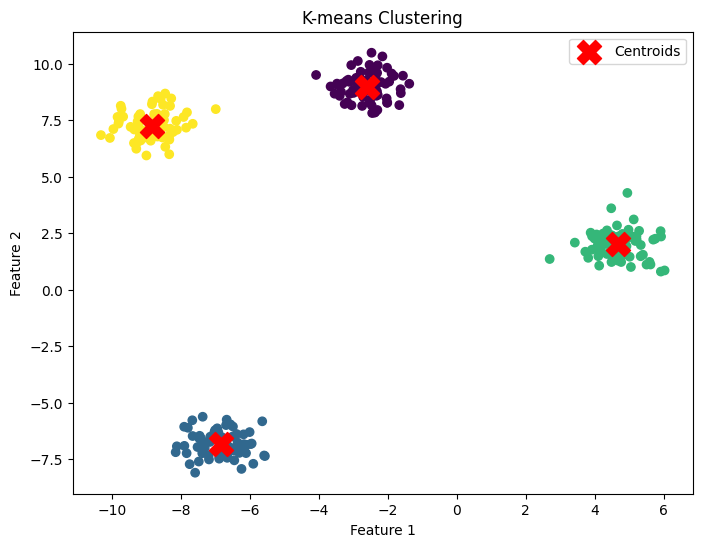

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Gerar dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Aplicar K-means com k=4
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


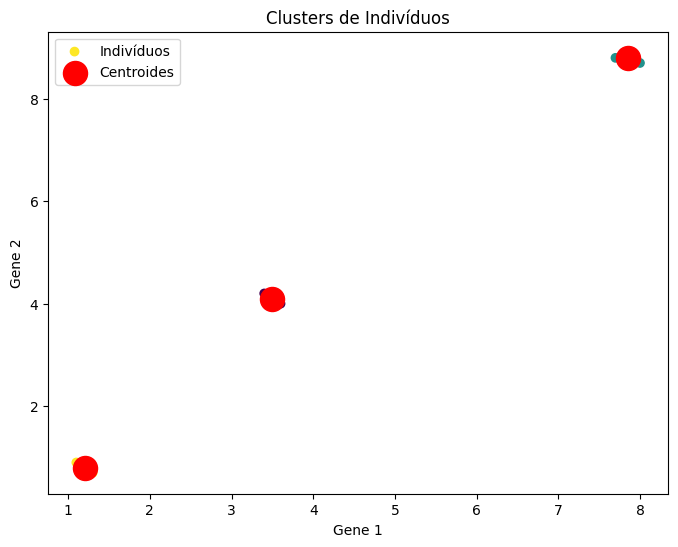

Pai 1: [3.5 4.1]
Pai 2: [3.6 4. ]
Filho: [3.55 4.05]
Pai 1: [3.5 4.1]
Pai 2: [1.2 0.8]
Filho: [2.35 2.45]


In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Genes dos indivíduos (10 indivíduos, 2 genes cada)
individuos = np.array([
    [1.2, 0.8], [1.3, 0.7], [1.1, 0.9],   # Cluster 1 (parecidos)
    [3.5, 4.1], [3.6, 4.0], [3.4, 4.2],   # Cluster 2 (parecidos)
    [7.8, 8.9], [7.7, 8.8], [8.0, 8.7], [7.9, 8.8]  # Cluster 3 (parecidos)
])

# Aplicar K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(individuos)

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(individuos[:, 0], individuos[:, 1], c=labels, cmap='viridis', label='Indivíduos')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title("Clusters de Indivíduos")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
plt.legend()
plt.show()


# Escolher dois indivíduos aleatórios do Cluster 0
cluster_0_indices = np.where(labels == 0)[0]
pai_1 = individuos[cluster_0_indices[0]]
pai_2 = individuos[cluster_0_indices[1]]

# Cruzamento: média dos genes
filho = (pai_1 + pai_2) / 2
print("Pai 1:", pai_1)
print("Pai 2:", pai_2)
print("Filho:", filho)

# Escolher um pai do Cluster 0 e outro do Cluster 2
pai_1 = individuos[np.where(labels == 0)[0][0]]
pai_2 = individuos[np.where(labels == 2)[0][0]]

# Cruzamento: média dos genes
filho = (pai_1 + pai_2) / 2
print("Pai 1:", pai_1)
print("Pai 2:", pai_2)
print("Filho:", filho)


In [5]:
import numpy as np

# Função objetivo a ser maximizada
def fitness_function(x):
    return -x**2 + 5*x + 10

# Inicializa a população
def initialize_population(size, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, size)

# Seleção por torneio
def tournament_selection(population, fitness, k=3):
    selected = np.random.choice(np.arange(len(population)), k, replace=False)
    best = selected[np.argmax(fitness[selected])]
    return population[best]

# Cruzamento (média aritmética)
def crossover(parent1, parent2):
    return (parent1 + parent2) / 2

# Mutação fixa
def fixed_mutation(individual, mutation_rate, lower_bound, upper_bound):
    if np.random.rand() < mutation_rate:
        return np.clip(individual + np.random.uniform(-1, 1), lower_bound, upper_bound)
    return individual

# Hipermutação fixa
def hypermutation_fixed(population, reset_fraction, mutation_rate, lower_bound, upper_bound):
    num_to_reset = int(len(population) * reset_fraction)
    reset_indices = np.random.choice(len(population), num_to_reset, replace=False)
    for i in reset_indices:
        population[i] = np.random.uniform(lower_bound, upper_bound)
    for i in range(len(population)):
        if i not in reset_indices:
            population[i] = fixed_mutation(population[i], mutation_rate, lower_bound, upper_bound)
    return population

# Hipermutação genética
def hypermutation_genetic(individual, mutation_control_bits, mutation_rate, lower_bound, upper_bound):
    mutation_rate_dynamic = mutation_rate * (1 + np.sum(mutation_control_bits) / len(mutation_control_bits))
    if np.random.rand() < mutation_rate_dynamic:
        return np.clip(individual + np.random.uniform(-1, 1), lower_bound, upper_bound)
    return individual

# Parâmetros do algoritmo genético
population_size = 10
generations = 50
lower_bound, upper_bound = 0, 10
mutation_rate = 0.1
reset_fraction = 0.3

# Inicializa a população
population = initialize_population(population_size, lower_bound, upper_bound)

# Loop do algoritmo genético
for generation in range(generations):
    # Avalia a aptidão de cada indivíduo
    fitness = np.array([fitness_function(x) for x in population])

    # Nova população
    new_population = []
    for _ in range(population_size // 2):
        # Seleção
        parent1 = tournament_selection(population, fitness)
        parent2 = tournament_selection(population, fitness)

        # Cruzamento
        offspring1 = crossover(parent1, parent2)
        offspring2 = crossover(parent2, parent1)

        # Mutação fixa
        offspring1 = fixed_mutation(offspring1, mutation_rate, lower_bound, upper_bound)

        # Alternar para hipermutação fixa
        population = hypermutation_fixed(population, reset_fraction, mutation_rate, lower_bound, upper_bound)

        # Alternar para hipermutação genética (adicionando bits de controle)
        mutation_control_bits = np.random.randint(0, 2, size=3)  # Exemplo de bits de controle
        offspring2 = hypermutation_genetic(offspring2, mutation_control_bits, mutation_rate, lower_bound, upper_bound)

        # Adicionar descendentes à nova população
        new_population.append(offspring1)
        new_population.append(offspring2)

    # Atualiza a população
    population = np.array(new_population)

    # Melhor indivíduo da geração
    best_index = np.argmax(fitness)
    print(f"Geração {generation + 1}: Melhor solução = {population[best_index]:.4f}, Fitness = {fitness[best_index]:.4f}")

# Resultado final
best_index = np.argmax(fitness)
print(f"\nMelhor solução encontrada: x = {population[best_index]:.4f}, Fitness = {fitness[best_index]:.4f}")


Geração 1: Melhor solução = 4.1721, Fitness = 16.1213
Geração 2: Melhor solução = 2.8113, Fitness = 16.1180
Geração 3: Melhor solução = 4.2413, Fitness = 16.1531
Geração 4: Melhor solução = 3.6624, Fitness = 16.2499
Geração 5: Melhor solução = 2.6613, Fitness = 16.2240
Geração 6: Melhor solução = 2.6613, Fitness = 16.2240
Geração 7: Melhor solução = 6.1438, Fitness = 16.2361
Geração 8: Melhor solução = 2.3691, Fitness = 16.2495
Geração 9: Melhor solução = 2.3691, Fitness = 16.2329
Geração 10: Melhor solução = 2.4264, Fitness = 16.2371
Geração 11: Melhor solução = 8.0334, Fitness = 16.2446
Geração 12: Melhor solução = 2.5163, Fitness = 16.2395
Geração 13: Melhor solução = 2.8096, Fitness = 16.2497
Geração 14: Melhor solução = 3.0924, Fitness = 16.1541
Geração 15: Melhor solução = 2.8096, Fitness = 16.1541
Geração 16: Melhor solução = 3.1231, Fitness = 16.1541
Geração 17: Melhor solução = 3.2988, Fitness = 16.0577
Geração 18: Melhor solução = 2.8836, Fitness = 16.1029
Geração 19: Melhor 

O que é hipermutação em algoritmos genéticos?
A hipermutação é uma variação do operador de mutação em algoritmos genéticos (AG), projetada para aumentar a diversidade da população, especialmente em situações onde o algoritmo pode estar preso em ótimos locais ou em paisagens dinâmicas (ambientes que mudam ao longo do tempo). Diferentemente da mutação fixa tradicional, a hipermutação introduz uma taxa de mutação variável ou inclui substituições aleatórias para algumas soluções, com o objetivo de explorar melhor o espaço de busca.

Como funciona a hipermutação?
Mutação fixa tradicional:

Na mutação fixa, cada indivíduo tem uma taxa de mutação constante durante todo o processo de evolução.
Por exemplo, se a taxa de mutação é 
0
,
05
0,05, 5% dos genes de cada indivíduo podem ser alterados aleatoriamente.
Hipermutação fixa:

Introduz dois mecanismos:
Redefinição aleatória de uma fração fixa de soluções da população: algumas soluções são substituídas completamente por soluções geradas aleatoriamente.
Mutação regular nos demais indivíduos: as soluções restantes sofrem mutações usando uma taxa de mutação predefinida.
Exemplo:
Suponha uma população com 6 soluções (
𝐴
,
𝐵
,
𝐶
,
𝐷
,
𝐸
,
𝐹
A,B,C,D,E,F).
Uma fração fixa (digamos 1/3) das soluções (
𝐴
A e 
𝐵
B) é redefinida aleatoriamente.
As outras soluções (
𝐶
,
𝐷
,
𝐸
,
𝐹
C,D,E,F) são mutadas com uma taxa de mutação específica.
Hipermutação genética:

Aqui, a taxa de mutação não é fixa. Em vez disso:
Cada solução tem bits adicionais que controlam sua taxa de mutação.
Esses bits determinam se uma solução será mutada ou substituída por uma nova solução aleatória.
Exemplo:
Cada solução tem "bits de controle" que definem:
A taxa de substituição aleatória.
A taxa de mutação para os genes restantes.
Isso permite que cada solução "decida" sua taxa de mutação, dependendo de seu estado ou posição no espaço de busca.
Exemplo prático: Hipermutação fixa
Considere uma população com 6 indivíduos (
𝐴
,
𝐵
,
𝐶
,
𝐷
,
𝐸
,
𝐹
A,B,C,D,E,F) e uma fração de redefinição fixa de 
1
/
3
1/3:

Selecione 
1
/
3
1/3 da população (
𝐴
A e 
𝐵
B) e substitua essas soluções por novas soluções aleatórias.
Nos indivíduos restantes (
𝐶
,
𝐷
,
𝐸
,
𝐹
C,D,E,F), aplique uma mutação regular com uma taxa de mutação de 
0
,
05
0,05.
Exemplo prático: Hipermutação genética
Imagine que cada solução contém 3 bits adicionais que definem o controle de mutação:

Solução original: 
[
0.5
,
1.2
,
0.9
]
[0.5,1.2,0.9]
Bits adicionais: 
[
1
,
0
,
1
]
[1,0,1]
Os bits adicionais são convertidos para um valor 
𝑘
k (por exemplo, 
𝑘
=
5
k=5).
A taxa de mutação é ajustada com base em 
𝑘
k, variando de uma taxa mínima (
0
,
03
0,03) até uma taxa mais alta (
0
,
1
0,1).
O operador decide, com base nesses bits, se a solução será:
Mutada (modificação dos genes).
Substituída aleatoriamente (nova solução gerada).
Vantagens da hipermutação
Aumento da diversidade:
Soluções aleatórias introduzidas ajudam a evitar convergência prematura e a explorar o espaço de busca.
Adaptação a mudanças:
Em ambientes dinâmicos, a hipermutação permite que o algoritmo reaja rapidamente a mudanças na paisagem do problema.
Customização local:
Bits adicionais ou frações controladas permitem ajustes específicos para diferentes partes da população.
Desvantagens
Custo computacional:
A redefinição de soluções e o cálculo de taxas dinâmicas podem ser computacionalmente intensivos.
Perda de boas soluções:
Redefinições aleatórias podem descartar indivíduos potencialmente promissores.
Conclusão
A hipermutação é uma técnica avançada que combina substituições aleatórias e mutações ajustáveis para melhorar a exploração em algoritmos genéticos. Ela é especialmente útil em problemas dinâmicos ou altamente complexos, onde a diversidade populacional é crucial para o sucesso do algoritmo.

In [ ]:
import numpy as np
import random


# Função para calcular o custo de uma rota (distância total)
def calculate_cost(route, distance_matrix):
    cost = 0
    for i in range(len(route)):
        cost += distance_matrix[route[i - 1]][route[i]]  # Soma distâncias entre cidades consecutivas
    return cost


# Função para gerar uma população inicial
def generate_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]


# Função de seleção por torneio
def tournament_selection(population, fitness, k=3):
    selected = random.sample(list(zip(population, fitness)), k)
    return min(selected, key=lambda x: x[1])[0]


# Crossover Parcialmente Mapeado (PMX)
def pmx(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    start, end = sorted(random.sample(range(size), 2))

    # Copiar o segmento do pai 1 para o filho
    child[start:end + 1] = parent1[start:end + 1]

    # Mapeamento do pai 2 para o filho
    for i in range(start, end + 1):
        if parent2[i] not in child:
            pos = i
            while start <= pos <= end:
                pos = parent2.index(parent1[pos])
            child[pos] = parent2[i]

    # Preencher genes restantes do pai 2
    for i in range(size):
        if child[i] == -1:
            child[i] = parent2[i]

    return child


# Crossover de Ciclo (CX)
def cx(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    cycle_start = 0

    while -1 in child:
        index = cycle_start
        while True:
            child[index] = parent1[index]
            index = parent1.index(parent2[index])
            if index == cycle_start:
                break
        cycle_start = child.index(-1) if -1 in child else size

    return child


# Crossover de Ordem (OX)
def ox(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size

    # Copiar segmento do pai 1 para o filho
    child[start:end + 1] = parent1[start:end + 1]

    # Preencher genes restantes do pai 2 na ordem
    pos = (end + 1) % size
    for gene in parent2:
        if gene not in child:
            child[pos] = gene
            pos = (pos + 1) % size

    return child


# Função de mutação: troca de duas cidades
def mutate(route):
    i, j = random.sample(range(len(route)), 2)
    route[i], route[j] = route[j], route[i]
    return route


# Algoritmo Genético
def genetic_algorithm(distance_matrix, pop_size=100, generations=500, crossover_type='PMX'):
    num_cities = len(distance_matrix)
    population = generate_population(pop_size, num_cities)

    for generation in range(generations):
        # Avaliar a aptidão (fitness)
        fitness = [calculate_cost(ind, distance_matrix) for ind in population]

        # Nova geração
        new_population = []

        for _ in range(pop_size // 2):
            # Seleção
            parent1 = tournament_selection(population, fitness)
            parent2 = tournament_selection(population, fitness)

            # Crossover
            if crossover_type == 'PMX':
                child1 = pmx(parent1, parent2)
                child2 = pmx(parent2, parent1)
            elif crossover_type == 'CX':
                child1 = cx(parent1, parent2)
                child2 = cx(parent2, parent1)
            elif crossover_type == 'OX':
                child1 = ox(parent1, parent2)
                child2 = ox(parent2, parent1)
            else:
                raise ValueError("Tipo de crossover inválido. Escolha entre 'PMX', 'CX' ou 'OX'.")

            # Mutação
            if random.random() < 0.2:  # Taxa de mutação
                child1 = mutate(child1)
            if random.random() < 0.2:
                child2 = mutate(child2)

            new_population.extend([child1, child2])

        population = new_population

    # Melhor solução encontrada
    fitness = [calculate_cost(ind, distance_matrix) for ind in population]
    best_index = np.argmin(fitness)
    return population[best_index], fitness[best_index]


# Exemplo de uso
if __name__ == "__main__":
    # Matriz de distâncias entre cidades
    distance_matrix = np.array([
        [0, 29, 20, 21],
        [29, 0, 15, 17],
        [20, 15, 0, 28],
        [21, 17, 28, 0]
    ])

    # Executar o algoritmo para cada crossover
    for crossover in ['PMX', 'CX', 'OX']:
        best_route, best_cost = genetic_algorithm(distance_matrix, pop_size=50, generations=200, crossover_type=crossover)
        print(f"\nCrossover: {crossover}")
        print(f"Melhor rota: {best_route}")
        print(f"Custo: {best_cost}")
